**🔧 Setup Required**: Before running this notebook, please follow the [setup instructions](../../README.md#setup-instructions) to configure your environment and API keys.

# Building Multilingual Pipelines with TextLanguageRouter

Welcome to this notebook where we'll explore the `TextLanguageRouter` in Haystack. This router automatically detects the language of input text and routes it to language-specific processing paths.

## What You'll Learn

- How to implement language-based routing
- Automatic language detection for multilingual applications
- Building language-specific processing pipelines
- Handling multiple languages in a single system

## Why TextLanguageRouter Matters

Multilingual applications require different handling for different languages:
- Different embedding models per language
- Language-specific retrievers
- Translation pipelines when needed
- Region-specific knowledge bases

The TextLanguageRouter makes this seamless by automatically detecting and routing based on language.

## 1. Core TextLanguageRouter Components

Let's import the TextLanguageRouter and understand how it works:

### How It Works

1. Uses language detection to identify the input language
2. Routes text to predefined language-specific outputs
3. Handles unknown languages with fallback behavior
4. Dynamically creates output sockets based on detected languages

In [1]:
# Import routing components
from haystack.components.routers import TextLanguageRouter

## 2. Understanding TextLanguageRouter

The `TextLanguageRouter` detects the language of input text and routes it to language-specific processing paths. This is essential for multilingual applications.

Let's create a simple example that routes text based on detected language.

In [2]:
# Example: TextLanguageRouter for multilingual support
from haystack import Pipeline

# Create a language router
language_router = TextLanguageRouter()

# Test with queries in different languages
multilingual_queries = [
    "What is Haystack?",  # English
    "¿Qué es Haystack?",  # Spanish
    "Qu'est-ce que Haystack?",  # French
    "Was ist Haystack?",  # German
    "Haystack是什么？",  # Chinese
]

print("Testing TextLanguageRouter:\n")
for query in multilingual_queries:
    result = language_router.run(text=query)
    # The router outputs to language-specific keys (e.g., 'en', 'es', 'fr')
    route = list(result.keys())[0] if result else "unknown"
    print(f"Query: '{query}'")
    print(f"Detected language: {route}")
    print(f"Routed text: {result.get(route, 'N/A')}\n")

Testing TextLanguageRouter:

Query: 'What is Haystack?'
Detected language: en
Routed text: What is Haystack?

Query: '¿Qué es Haystack?'
Detected language: unmatched
Routed text: ¿Qué es Haystack?

Query: 'Qu'est-ce que Haystack?'
Detected language: unmatched
Routed text: Qu'est-ce que Haystack?

Query: 'Was ist Haystack?'
Detected language: en
Routed text: Was ist Haystack?

Query: 'Haystack是什么？'
Detected language: unmatched
Routed text: Haystack是什么？



## 3. Visualizing the TextLanguageRouter

Let's see how the language router works in practice. The `TextLanguageRouter` dynamically creates output sockets based on the languages it detects, so we'll test it directly rather than building a fixed pipeline structure.

In [3]:
# The TextLanguageRouter dynamically creates outputs based on detected languages
# Let's demonstrate this by processing multiple texts and showing the routing

from haystack import Pipeline
from haystack.components.builders import PromptBuilder

# Test with a batch of multilingual queries to see all routes
test_texts = [
    "What is Haystack?",  # English
    "¿Qué es Haystack?",  # Spanish
    "Qu'est-ce que Haystack?",  # French
]

print("TextLanguageRouter in Action:\n")
print("=" * 80)

language_router = TextLanguageRouter()

for text in test_texts:
    result = language_router.run(text=text)
    detected_lang = list(result.keys())[0] if result else "unknown"
    print(f"\nInput: '{text}'")
    print(f"Detected language code: {detected_lang}")
    print(f"Output: {result.get(detected_lang, 'N/A')}")
    print("-" * 80)

TextLanguageRouter in Action:


Input: 'What is Haystack?'
Detected language code: en
Output: What is Haystack?
--------------------------------------------------------------------------------

Input: '¿Qué es Haystack?'
Detected language code: unmatched
Output: ¿Qué es Haystack?
--------------------------------------------------------------------------------

Input: 'Qu'est-ce que Haystack?'
Detected language code: unmatched
Output: Qu'est-ce que Haystack?
--------------------------------------------------------------------------------


## 4. Building a Language-Based Routing Pipeline

For visualization purposes, we'll create a pipeline that shows the concept of language-based routing using a ConditionalRouter with language detection logic.

In [4]:
# Create a pipeline with fixed language routes for visualization
from haystack.components.routers import ConditionalRouter

viz_pipeline = Pipeline()

# Use ConditionalRouter with language detection logic
language_routes = [
    {
        "condition": "{{ 'what' in query.lower() or 'is' in query.lower() or 'how' in query.lower() }}",
        "output": "{{ query }}",
        "output_name": "english",
        "output_type": str,
    },
    {
        "condition": "{{ 'qué' in query.lower() or 'es' in query.lower() }}",
        "output": "{{ query }}",
        "output_name": "spanish",
        "output_type": str,
    },
    {
        "condition": "{{ 'qu' in query.lower() or 'est' in query.lower() }}",
        "output": "{{ query }}",
        "output_name": "french",
        "output_type": str,
    },
    {
        "condition": "{{ True }}",
        "output": "{{ query }}",
        "output_name": "default",
        "output_type": str,
    },
]

lang_router = ConditionalRouter(routes=language_routes)
viz_pipeline.add_component("language_router", lang_router)

# Add language-specific prompt builders
en_template = "Processing English query: {{ query }}"
es_template = "Procesando consulta en español: {{ query }}"
fr_template = "Traitement de la requête en français: {{ query }}"

en_prompt = PromptBuilder(template=en_template)
es_prompt = PromptBuilder(template=es_template)
fr_prompt = PromptBuilder(template=fr_template)

viz_pipeline.add_component("en_prompt", en_prompt)
viz_pipeline.add_component("es_prompt", es_prompt)
viz_pipeline.add_component("fr_prompt", fr_prompt)

# Connect the router to language-specific components
viz_pipeline.connect("language_router.english", "en_prompt.query")
viz_pipeline.connect("language_router.spanish", "es_prompt.query")
viz_pipeline.connect("language_router.french", "fr_prompt.query")

PromptBuilder has 1 prompt variables, but `required_variables` is not set. By default, all prompt variables are treated as optional, which may lead to unintended behavior in multi-branch pipelines. To avoid unexpected execution, ensure that variables intended to be required are explicitly set in `required_variables`.
PromptBuilder has 1 prompt variables, but `required_variables` is not set. By default, all prompt variables are treated as optional, which may lead to unintended behavior in multi-branch pipelines. To avoid unexpected execution, ensure that variables intended to be required are explicitly set in `required_variables`.
PromptBuilder has 1 prompt variables, but `required_variables` is not set. By default, all prompt variables are treated as optional, which may lead to unintended behavior in multi-branch pipelines. To avoid unexpected execution, ensure that variables intended to be required are explicitly set in `required_variables`.
PromptBuilder has 1 prompt variables, but `

🚅 Components
  - language_router: ConditionalRouter
  - en_prompt: PromptBuilder
  - es_prompt: PromptBuilder
  - fr_prompt: PromptBuilder
🛤️ Connections
  - language_router.english -> en_prompt.query (str)
  - language_router.spanish -> es_prompt.query (str)
  - language_router.french -> fr_prompt.query (str)

Language Routing Pipeline Structure:

Pipeline diagram saved to: ../images/language_routing_pipeline.png


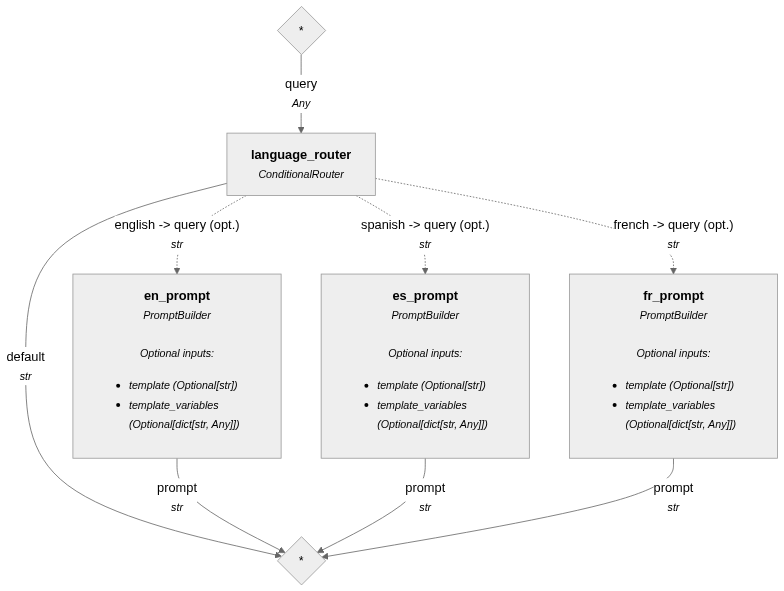

In [5]:
# Visualize the pipeline
import os

print("Language Routing Pipeline Structure:\n")
image_path = os.path.join("../images", "language_routing_pipeline.png")
viz_pipeline.draw(path=image_path)
print(f"Pipeline diagram saved to: {image_path}")

# Display the pipeline
try:
    from IPython.display import Image, display
    display(Image(image_path))
except Exception as e:
    print(f"Could not display image: {e}")

## 5. Advanced Language Routing Patterns

In production systems, you might want to:

1. **Use Language-Specific Models**: Route to different embedding models per language
2. **Implement Translation**: Add translation components for unsupported languages
3. **Language-Specific Document Stores**: Maintain separate indexes per language
4. **Fallback Strategies**: Handle unknown or mixed-language queries

### Example Use Cases

- **Customer Support**: Route queries to agents fluent in the detected language
- **Content Recommendation**: Suggest language-appropriate content
- **Document Search**: Search in language-specific document collections
- **Multi-Region Services**: Direct queries to region-specific knowledge bases

## 6. Summary and Best Practices

### What We Covered

- ✅ Automatic language detection with TextLanguageRouter
- ✅ Building multilingual processing pipelines
- ✅ Handling multiple languages in a single system
- ✅ Visualizing language-based routing flows

### Key Takeaways

1. **Automatic Detection**: TextLanguageRouter detects language without explicit configuration
2. **Dynamic Outputs**: Output sockets are created dynamically based on detected languages
3. **Production Ready**: Built-in language detection is fast and accurate
4. **Flexible Integration**: Works seamlessly with other Haystack components

### Best Practices

- Test with diverse language samples
- Implement fallback handling for unknown languages
- Consider mixed-language queries
- Use language-specific models when available
- Monitor language distribution in your queries

### Next Steps

- Integrate language-specific embedding models
- Add translation components for unsupported languages
- Build language-specific document stores
- Implement monitoring for language distribution

Happy multilingual routing! 🌍🚀